<a href="https://colab.research.google.com/github/rajkachhadiya123/quantity_analysis_time_series_data/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [3]:
#  dataset load

df = pd.read_excel('dataset.xlsx')

df



,OrderDate,ParentProductIdNew,ParentProductNew,ProductCategoryNew,ArtistNameNew,total_qty_sales,Selling Price,productListViews,productListClicks
0,2019-01-01,11,Product 11,Category 1,TSSOS,3,399.000000,NaN,NaN
1,2019-01-01,114,Product 114,Category 8,TSSA,10,549.000000,NaN,NaN
2,2019-01-01,98,Product 98,Category 8,TSSHT,8,499.000000,NaN,NaN
3,2019-01-01,97,Product 97,Category 8,TSSF,6,549.000000,NaN,NaN
4,2019-01-01,8,Product 8,Category 1,TSSML,6,399.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
40558,2020-12-31,18,Product 18,Category 2,TSSDP,19,570.052632,12004.0,104.0
40559,2020-12-31,76,Product 76,Category 6,TSSML,16,861.500000,2367.0,76.0
40560,2020-12-31,21,Product 21,Category 2,TSSML,5,619.000000,3697.0,60.0
40561,2020-12-31,52,Product 52,Category 4,TSSCC,18,1299.000000,34690.0,553.0


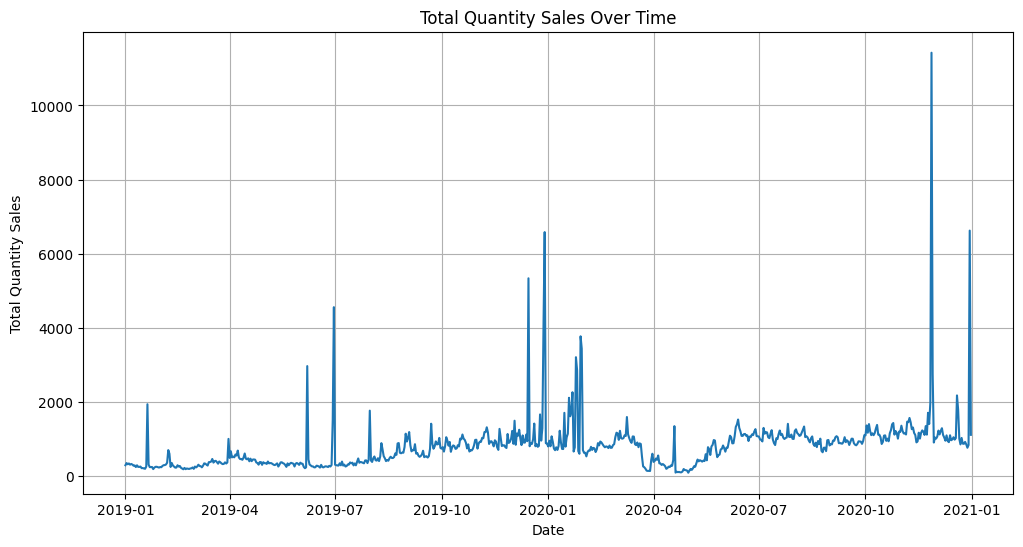

In [5]:
# Aggregate data by OrderDate and sum total_qty_sales
daily_sales = df.groupby('OrderDate')['total_qty_sales'].sum().reset_index()

# Set OrderDate as index for plotting
daily_sales = daily_sales.set_index('OrderDate')

# Plot the raw time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['total_qty_sales'])
plt.title('Total Quantity Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sales')
plt.grid(True)
plt.show()

In [6]:
df = df.set_index('OrderDate')
display(df.head())

,ParentProductIdNew,ParentProductNew,ProductCategoryNew,ArtistNameNew,total_qty_sales,Selling Price,productListViews,productListClicks
OrderDate,,,,,,,,
2019-01-01,11,Product 11,Category 1,TSSOS,3,399.0,NaN,NaN
2019-01-01,114,Product 114,Category 8,TSSA,10,549.0,NaN,NaN
2019-01-01,98,Product 98,Category 8,TSSHT,8,499.0,NaN,NaN
2019-01-01,97,Product 97,Category 8,TSSF,6,549.0,NaN,NaN
2019-01-01,8,Product 8,Category 1,TSSML,6,399.0,NaN,NaN


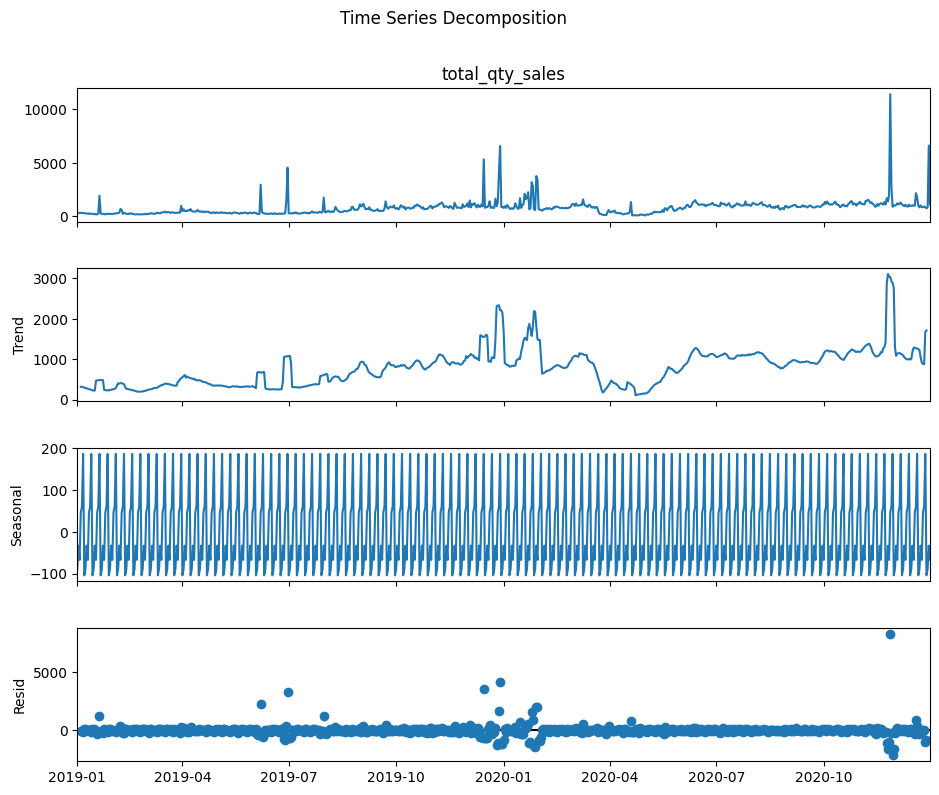

In [7]:
#daily_sales.index.freq checks if the Pandas DateTimeIndex has a known, regular frequency (like daily, monthly, etc.).
if daily_sales.index.freq is None:
    daily_sales = daily_sales.asfreq('D')

#If no frequency is set (i.e., freq is None), then .asfreq('D') explicitly sets the frequency to daily.


decomposition = seasonal_decompose(daily_sales['total_qty_sales'], model='additive')

# plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition', y=1.02)
plt.show()



#plot : Long-term direction
#seasonal : repeating pattern
#resid : noise

In [8]:
train = daily_sales[:int(0.8 * len(daily_sales))]
test = daily_sales[int(0.8 * len(daily_sales)):]

# Fit ARIMA model
# Using (5,1,0) order based on typical time series analysis
model = ARIMA(train['total_qty_sales'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Print summary of the model
print(model_fit.summary())

# Print the forecast
print("\nForecast:")
print(forecast)

                               SARIMAX Results                                
Dep. Variable:        total_qty_sales   No. Observations:                  584
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4424.823
Date:                Wed, 11 Jun 2025   AIC                           8861.647
Time:                        15:13:36   BIC                           8887.856
Sample:                    01-01-2019   HQIC                          8871.862
                         - 08-06-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5412      0.014    -40.058      0.000      -0.568      -0.515
ar.L2         -0.5612      0.023    -24.278      0.000      -0.607      -0.516
ar.L3         -0.3881      0.026    -15.011      0.0

In [21]:
from sklearn.preprocessing import MinMaxScaler

# removing outliers and normalize in qty column for better accuracy.


# Step 1: Remove anomalies (outliers)
mean = daily_sales['total_qty_sales'].mean()
std = daily_sales['total_qty_sales'].std()
threshold = mean + 3 * std


cleaned_sales = daily_sales[daily_sales['total_qty_sales'] <= threshold]

# Step 2: Normalize the sales column
scaler = MinMaxScaler()
cleaned_sales['scaled_sales'] = scaler.fit_transform(cleaned_sales[['total_qty_sales']])

# Step 3: Train-test split
train_size = int(len(cleaned_sales) * 0.8)
train = cleaned_sales.iloc[:train_size]
test = cleaned_sales.iloc[train_size:]

# Step 4: Fit ARIMA model on normalized data
model = ARIMA(train['scaled_sales'], order=(5,1,0))
model_fit = model.fit()

# Step 5: Forecast (normalized values)
forecast_scaled = model_fit.forecast(steps=len(test))

# Step 6: Inverse transform to get actual sales predictions
forecast_actual = scaler.inverse_transform(forecast_scaled.values.reshape(-1, 1))

# Ensure both actual and forecasted values are aligned
actual = results_df['Actual Sales']
predicted = results_df['Forecasted Sales']

# Calculate MAE and RMSE
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Print the results
print(f"📊 Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")


📊 Evaluation Metrics:
MAE (Mean Absolute Error): 187.42
RMSE (Root Mean Squared Error): 269.97


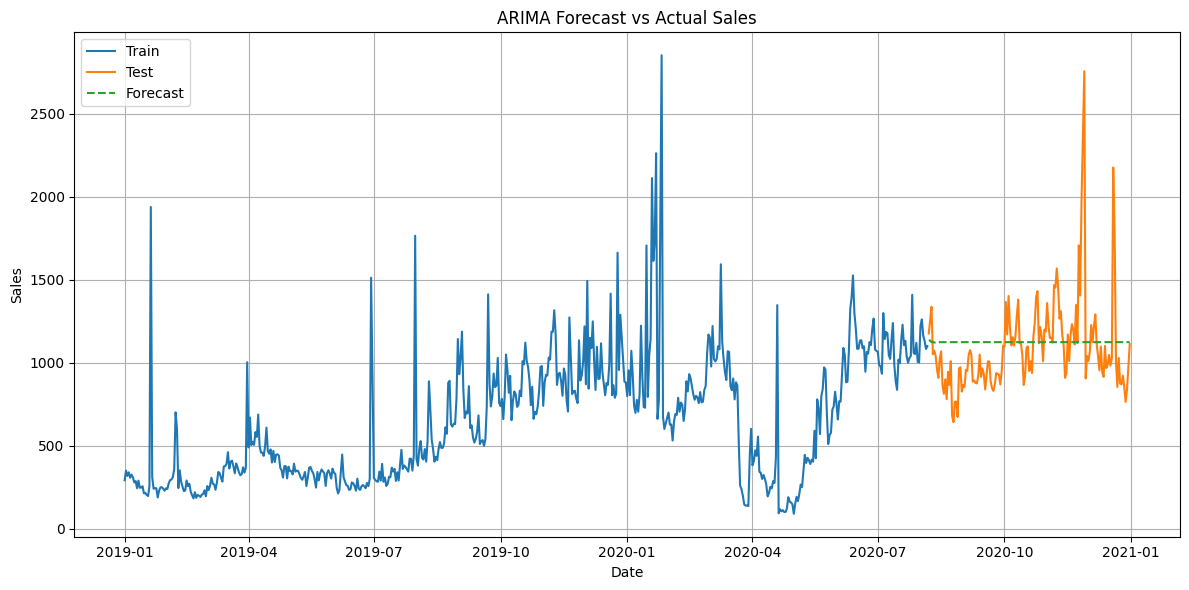


 Forecasted Results:
        Date  Actual Sales  Forecasted Sales
0 2020-08-07          1177       1134.141251
1 2020-08-08          1254       1135.007514
2 2020-08-09          1338       1125.809244
3 2020-08-10          1052       1126.349667
4 2020-08-11          1074       1122.512328
5 2020-08-12          1044       1122.567950
6 2020-08-13           962       1125.782611
7 2020-08-14           910       1125.787847
8 2020-08-15          1023       1124.732584
9 2020-08-16          1070       1125.081125


In [19]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_qty_sales'], label='Train')
plt.plot(test.index, test['total_qty_sales'], label='Test')
plt.plot(test.index, forecast_actual, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Forecasted Values
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test['total_qty_sales'].values,
    'Forecasted Sales': forecast_actual.flatten()
})
print("\n Forecasted Results:")
print(forecast_df.head(10))  # print top 10 forecasted results

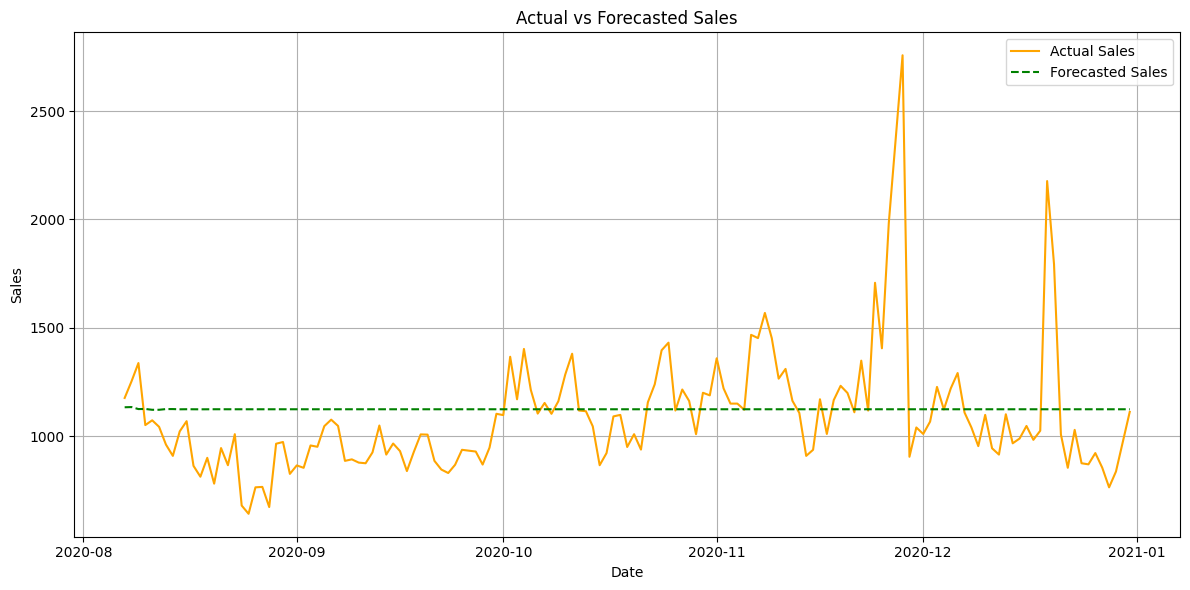

In [14]:


# graph for only actual data vs testing data (20%)


# Combine actual and forecast into one DataFrame for comparison
results_df = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test['total_qty_sales'].values,
    'Forecasted Sales': forecast_actual.flatten() # Use forecast_actual and flatten it
})

# Plot Actual vs Forecasted Sales
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Actual Sales'], label='Actual Sales', color='orange')
plt.plot(results_df['Date'], results_df['Forecasted Sales'], label='Forecasted Sales', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()